In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [3]:
# drive.mount('/gdrive', force_remount=True)
dataset_path_train = "/gdrive/MyDrive/dataset/7-7 dataset"
# dataset_path_test = "/gdrive/MyDrive/dataset/flower/test"

idg=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.8,1),
    zoom_range=0.1,
    validation_split=0.1,
    preprocessing_function=preprocess_input
)

train_data=idg.flow_from_directory(
    dataset_path_train,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    subset='training',
)
val_data=idg.flow_from_directory(
    dataset_path_train,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    subset='validation',

)

Found 1227 images belonging to 14 classes.
Found 131 images belonging to 14 classes.


In [4]:
model = tf.keras.applications.RegNetX032(include_top=False , weights="imagenet", input_shape=(224,224,3))

58216992/58216992 [==============================] - 2s 0us/step


In [9]:
my_model = models.Sequential([
    model,
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(14, activation="softmax"),
])

In [10]:
my_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

checkpoint = tf.keras.callbacks.ModelCheckpoint("/gdrive/MyDrive/best_model",
                                            save_best_only=True)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [11]:
history = my_model.fit(train_data, validation_data=val_data, epochs=20 ,callbacks=[stop_early, checkpoint])

Epoch 1/20
39/39 [==============================] - 538s 12s/step - loss: 4.9717 - accuracy: 0.2673 - val_loss: 2.6082 - val_accuracy: 0.2214
Epoch 2/20
39/39 [==============================] - 69s 2s/step - loss: 1.1410 - accuracy: 0.6430 - val_loss: 0.9267 - val_accuracy: 0.7252
Epoch 3/20
39/39 [==============================] - 33s 837ms/step - loss: 0.6383 - accuracy: 0.8126 - val_loss: 1.5037 - val_accuracy: 0.6031
Epoch 4/20
39/39 [==============================] - 66s 2s/step - loss: 0.5466 - accuracy: 0.8460 - val_loss: 0.5360 - val_accuracy: 0.8397
Epoch 5/20
39/39 [==============================] - 34s 856ms/step - loss: 0.4191 - accuracy: 0.8786 - val_loss: 0.8285 - val_accuracy: 0.8168
Epoch 6/20
39/39 [==============================] - 68s 2s/step - loss: 0.2679 - accuracy: 0.9226 - val_loss: 0.4557 - val_accuracy: 0.8779
Epoch 7/20
39/39 [==============================] - 37s 952ms/step - loss: 0.2676 - accuracy: 0.9307 - val_loss: 1.2798 - val_accuracy: 0.6565
Epoch 8/2

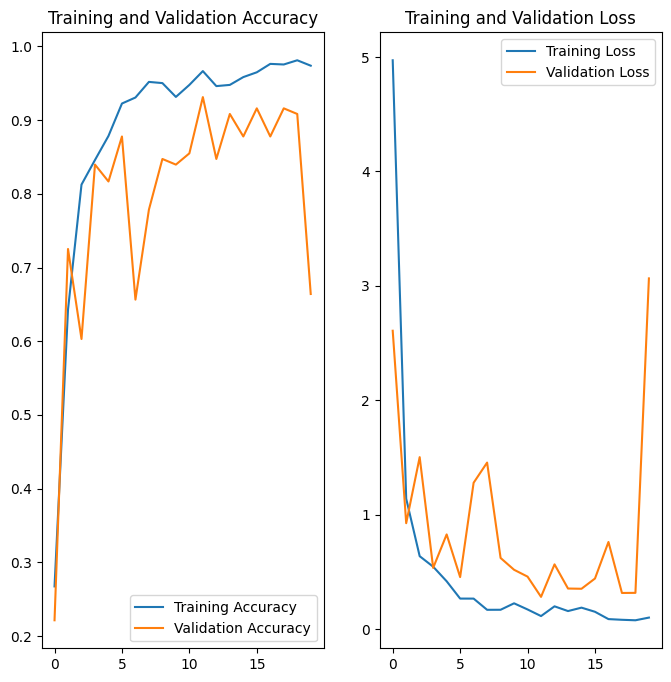

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
loaded_model = tf.keras.models.load_model('/gdrive/MyDrive/best_model')
# new_history = loaded_model.fit(train_dataset, epochs=20,
#                     validation_data=test_dataset,
#                     validation_steps=30,
#                     callbacks=[stop_early, checkpoint],
#                     )
loaded_model.evaluate(val_data)

5/5 [==============================] - 9s 1s/step - loss: 0.3150 - accuracy: 0.9084


[0.31499284505844116, 0.9083969593048096]

In [60]:
drive.mount('/gdrive', force_remount=True)
loaded_model.save('/gdrive/MyDrive/dataset/7_7.h5')

Mounted at /gdrive


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [79]:
Y_true = []
Y_pred = []

for i in range(5):
    images = val_data[i][0]
    for image in images:
        image = np.expand_dims(image, axis=0)
        prediction=loaded_model.predict(image)
        Y_pred.append(np.argmax(prediction))

for i in range(5):
    labels = val_data[i][1]
    for label in labels:
        # print(np.argmax(label.tolist()))
        Y_true.append(np.argmax(label.tolist()))  # append list

1/1 [==============================] - 0s 34ms/step


['Ali_Khamenei', 'Angelina_Jolie', 'Barak_Obama', 'Behnam_Bani', 'Donald_Trump', 'Emma_Watson', 'Han_Hye_Jin', 'Kim_Jong_Un', 'Leyla_Hatami', 'Lionel_Messi', 'Michelle_Obama', 'Morgan_Freeman', 'Queen_Elizabeth', 'Scarlett_Johansson']


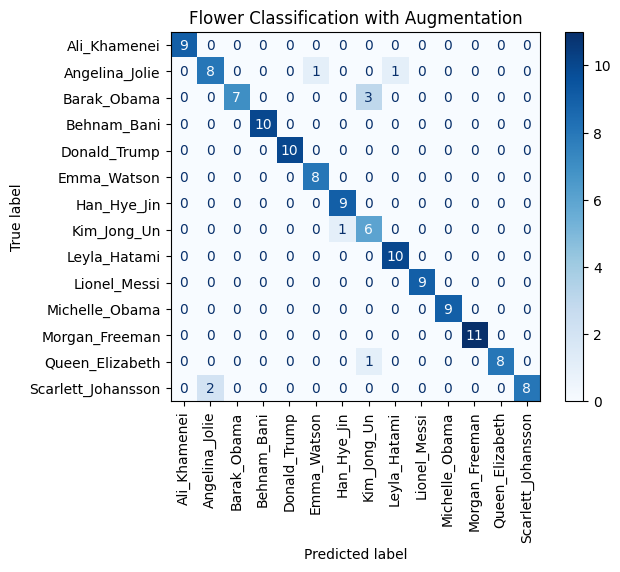

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels=[]
for i in val_data.class_indices:
  labels.append(i)
print(labels)
cm = confusion_matrix(Y_true, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues,xticks_rotation=90)
plt.title("Flower Classification with Augmentation")
# plt.savefig('output/confusionmatric_floweraug.jpg')
plt.show()

In [42]:
import cv2
import numpy as np

drive.mount('/gdrive', force_remount=True)
model11 = tf.keras.models.load_model('/gdrive/MyDrive/dataset/7_7.h5')

Mounted at /gdrive


In [65]:
dataset_path_test = "/gdrive/MyDrive/dataset/test_images"

idg=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_input
)

test_data=idg.flow_from_directory(
    dataset_path_test,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    subset='training',
)


Found 14 images belonging to 14 classes.


In [75]:
Y_testtrue = []
Y_testpred = []

label_show = ['Ali_Khamenei', 'Angelina_Jolie', 'Barak_Obama', 'Behnam_Bani', 'Donald_Trump', 'Emma_Watson', 'Han_Hye_Jin', 'Kim_Jong_Un', 'Leyla_Hatami', 'Lionel_Messi', 'Michelle_Obama', 'Morgan_Freeman', 'Queen_Elizabeth', 'Scarlett_Johansson']

for i in range(1):
    images = test_data[i][0]
    # print(len(labels))
    for image in images:
        # X.append(image)                    # append tensor
        image = np.expand_dims(image, axis=0)
        prediction=loaded_model.predict(image)
        Y_testpred.append(np.argmax(prediction))

for i in range(1):
    labels = test_data[i][1]
    for label in labels:
        Y_testtrue.append(np.argmax(label.tolist()))  # append list
for i,j in zip(Y_testtrue,Y_testpred):
    print(f'real picture:  {label_show[i]}    ======>     predicte picture:  {label_show[j]}\n')


1/1 [==============================] - 0s 33ms/step
real picture:  Morgan_Freeman    ======>     predicte picture:  Morgan_Freeman

real picture:  Scarlett_Johansson    ======>     predicte picture:  Scarlett_Johansson

real picture:  Michelle_Obama    ======>     predicte picture:  Emma_Watson

real picture:  Barak_Obama    ======>     predicte picture:  Barak_Obama

real picture:  Leyla_Hatami    ======>     predicte picture:  Leyla_Hatami

real picture:  Lionel_Messi    ======>     predicte picture:  Morgan_Freeman

real picture:  Emma_Watson    ======>     predicte picture:  Leyla_Hatami

real picture:  Donald_Trump    ======>     predicte picture:  Donald_Trump

real picture:  Ali_Khamenei    ======>     predicte picture:  Ali_Khamenei

real picture:  Queen_Elizabeth    ======>     predicte picture:  Queen_Elizabeth

real picture:  Han_Hye_Jin    ======>     predicte picture:  Ali_Khamenei

real picture:  Behnam_Bani    ======>     predicte picture:  Leyla_Hatami

real picture:  K